In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

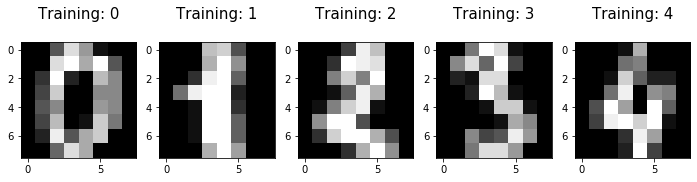

In [30]:
plt.figure(figsize=(12,3))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 15)

In [54]:
seed=10
X_train,X_test,Y_train,Y_test= train_test_split(digits.data, digits.target, test_size=0.20, random_state=seed)
l=LogisticRegression()
model = l.fit(X_train,Y_train)
predvalue=model.predict(X_test)
accuracy = accuracy_score(Y_test,predvalue)
accuracy

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9583333333333334

In [3]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
pca=PCA(n_components=64)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [109]:
newdf=pca.transform(df)
PcaTransform=pd.DataFrame(newdf)
PcaTransform.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-0.048785,-0.001816,0.011102,-0.001547,0.008247,0.002148,0.001044,-1.281899e-30,3.451266e-31,-6.913927e-16
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,-0.037350,-0.000654,-0.038619,-0.002925,-0.000707,-0.004463,-0.002565,4.487640e-16,1.878977e-15,1.670464e-16
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,-0.181676,-0.085384,0.025564,0.002220,0.002818,-0.000518,-0.013180,-3.587613e-16,-8.028040e-16,1.166543e-16
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,-0.001599,-0.011745,-0.067712,-0.002642,0.001546,0.000846,0.001941,5.950138e-16,-8.240297e-16,7.750076e-17
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,-0.018293,-0.053911,-0.009924,-0.019933,0.004465,0.001626,0.006915,-4.093486e-17,-1.142363e-15,4.890944e-17


In [162]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [165]:
cols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
subpca=PcaTransform[cols]

#### first 29 components in the transformed PCA subspace explains 95% of variance in original dataset

In [175]:
seed=10
X_train,X_test,Y_train,Y_test= train_test_split(PcaTransform[cols], digits.target, test_size=0.20, random_state=seed)
l=LogisticRegression()
model = l.fit(X_train,Y_train)
predvalue=model.predict(X_test)
accuracy = accuracy_score(Y_test,predvalue)
accuracy

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.95

In [185]:
cm = confusion_matrix(Y_test, predvalue)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  3,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

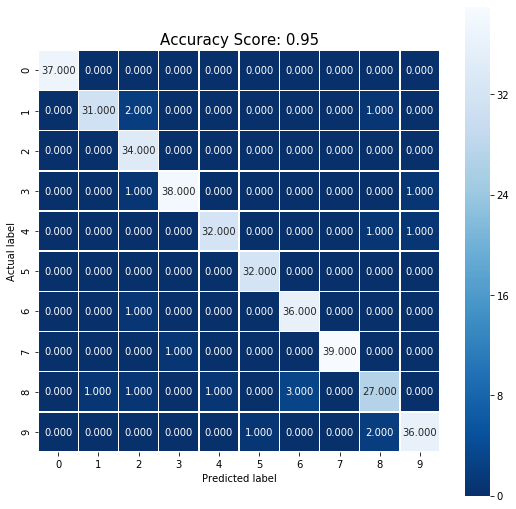

In [186]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);